In [76]:
import pandas as pd
import math
import matplotlib.pyplot as plt


In [104]:
train_data = pd.read_csv("./data.csv")
train_data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [105]:
train_data = train_data.drop(["Gender","family_history_with_overweight","FAVC","CAEC","SMOKE","SCC","CALC","MTRANS","NObeyesdad"], axis=1)
train_data["W/H"] = train_data["Weight"] / train_data["Height"]
train_data

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,W/H
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,39.506173
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,36.842105
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,42.777778
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,48.333333
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,50.449438
...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,76.814300
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,76.486427
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,76.297737
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,76.660232


In [107]:
from sklearn.preprocessing import StandardScaler

stardard_sc = StandardScaler()
X = stardard_sc.fit_transform(train_data)

# 標準化
train_data.loc[:, "Age":"W/H"] = X
train_data = pd.DataFrame(train_data)

# カテゴリ属性の数値化
train_data

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,W/H
0,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,-0.780550
1,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,-0.967342
2,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,-0.551160
3,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,-0.161631
4,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,-0.013260
...,...,...,...,...,...,...,...,...,...
2106,-0.525774,0.097045,1.711763,1.088342,0.404153,-0.456705,0.783135,0.407996,1.835321
2107,-0.367195,0.502844,1.800914,1.088342,0.404153,-0.004702,0.389341,-0.096251,1.812332
2108,-0.281909,0.541672,1.798868,1.088342,0.404153,0.075361,0.474971,-0.019018,1.799102
2109,0.007776,0.404927,1.785780,1.088342,0.404153,1.377801,0.151471,-0.117991,1.824518


In [108]:
def dist(x, y):
  return math.dist(x, y)


def get_k_th_dists(df: pd.DataFrame, k):
  ans = []
  for _, row in df.iterrows():
    dists = map(lambda x: dist(x[1], row), df.iterrows())
    sorted_list = sorted(list(dists))
    ans.append(sorted_list[k-1])
  return sorted(ans)


def plot_k_th_dists(df: pd.DataFrame, k):
  dists = get_k_th_dists(df, k)
  plt.plot(range(len(dists)), dists)
  plt.show()


In [109]:
pd.concat([train_data["W/H"], train_data["FAF"]], axis=1).describe()

,W/H,FAF
count,2.111000e+03,2.111000e+03
mean,5.343376e-17,2.325105e-16
std,1.000237e+00,1.000237e+00
min,-1.882601e+00,-1.188039e+00
25%,-7.130195e-01,-1.041630e+00
50%,-8.851971e-02,-1.210937e-02
75%,9.015069e-01,7.718565e-01
max,2.936066e+00,2.339750e+00


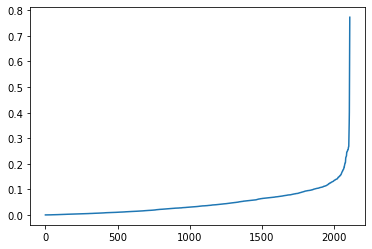

In [110]:
plot_k_th_dists(pd.concat([train_data["W/H"], train_data["FAF"]], axis=1), 4)

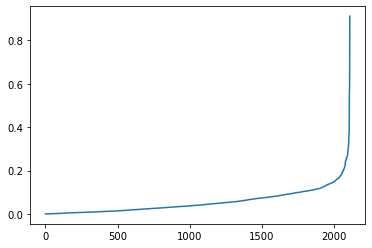

In [111]:
plot_k_th_dists(pd.concat([train_data["W/H"], train_data["FAF"]], axis=1), 5)

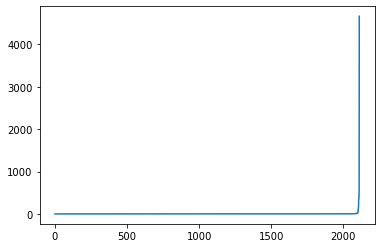

In [94]:
plot_k_th_dists(pd.concat([train_data["W/H"], train_data["FAF"]], axis=1), 6)

In [88]:
from sklearn.cluster import DBSCAN

# 標準化
agg = DBSCAN()
assignment = agg.fit_predict(train_data)



In [ ]:
# SSE
